Data Cleaning Section

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Function to take care of cleaning each dataset (may needed adjusting if format of data changes)
def Data_Cleaner(Data_Name, month): 
    Data_Name.rename(columns={'Unnamed: 0' : 'Dealership'}, inplace=True)
    Data_Name = Data_Name.iloc[0:27]
    Data_Name = Data_Name.assign(Month=[month]*27)
    Data_Name['TOTAL GROSS'] = Data_Name['TOTAL GROSS'].replace('[$,]', '', regex=True).astype(float)
    Data_Name['F&I'] = Data_Name['F&I'].replace('[$,]', '', regex=True).astype(float)
    Data_Name['Service Sales'] = Data_Name['Service Sales'].astype('int64')
    Data_Name['Portfolio/Campaign Sales'] = Data_Name['Portfolio/Campaign Sales'].astype('int64')
    Data_Name['Ordered'] = Data_Name['Ordered'].astype('int64')
    Data_Name['Total Sales'] = Data_Name['Total Sales'].astype('int64')
    Data_Name['Acquisition'] = Data_Name['Acquisition'].astype('int64')
    return Data_Name

In [40]:
February_Data = pd.read_csv('Portfolio Manager February.csv') 
February_Data = Data_Cleaner(February_Data, 'February')

March_Data = pd.read_csv('Portfolio Manager All Stores March 2022.xlsx - Totals.csv')
March_Data = Data_Cleaner(March_Data, 'March')

April_Data = pd.read_csv('Portfolio Report April 2022.csv')
April_Data = Data_Cleaner(April_Data, 'April')

May_Data = pd.read_csv('Portfolio Repor May 2022.xlsx - Totals.csv')
May_Data = Data_Cleaner(May_Data, 'May')

June_Data = pd.read_csv('PORTFOLIO JUNE JIM DANE.xlsx - Totals.csv')
June_Data = Data_Cleaner(June_Data, 'June')

July_Data = pd.read_csv('Portfolio Report July 2022.xlsx - Totals.csv')
July_Data = Data_Cleaner(July_Data, 'July')

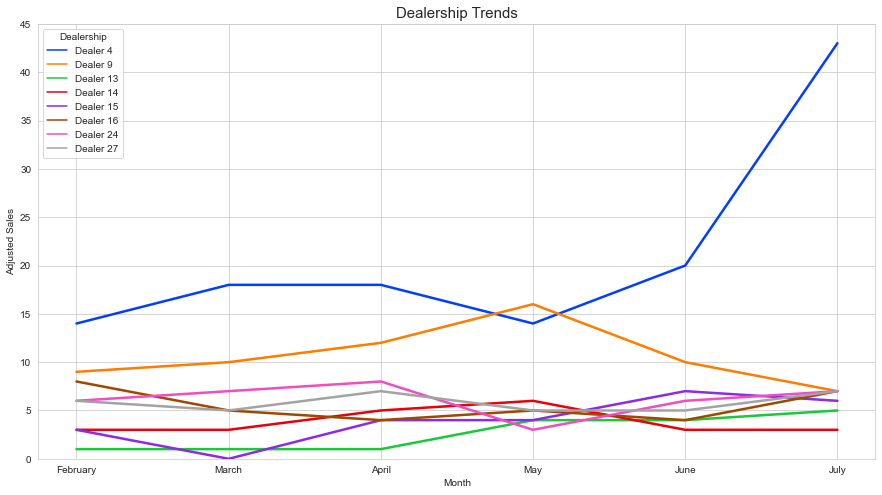

In [41]:
plt.figure(figsize=(15,8))
Mass_Data_Set = pd.concat([February_Data, March_Data, April_Data, May_Data, June_Data, July_Data], ignore_index=True)
Mass_Data_Set['Adjusted Sales'] = Mass_Data_Set['Total Sales'] - Mass_Data_Set['Ordered']
Jim_Stores = Mass_Data_Set[Mass_Data_Set['Dealership'].isin(['Dealer 4', 'Dealer 9', 'Dealer 13', 'Dealer 14', 'Dealer 15', 'Dealer 16', 'Dealer 24', 'Dealer 27'])]
dplot =sns.lineplot(data=Jim_Stores, x='Month', y='Adjusted Sales', hue='Dealership', linewidth=2.5, palette='bright')
dplot.set_title('Dealership Trends', fontsize=15)
sns.set_style('whitegrid')
dplot.set(ylim=(0,45))
plt.savefig('Adjusted_Dealership_Trends.png')
plt.show()
plt.close()

Analysis Section

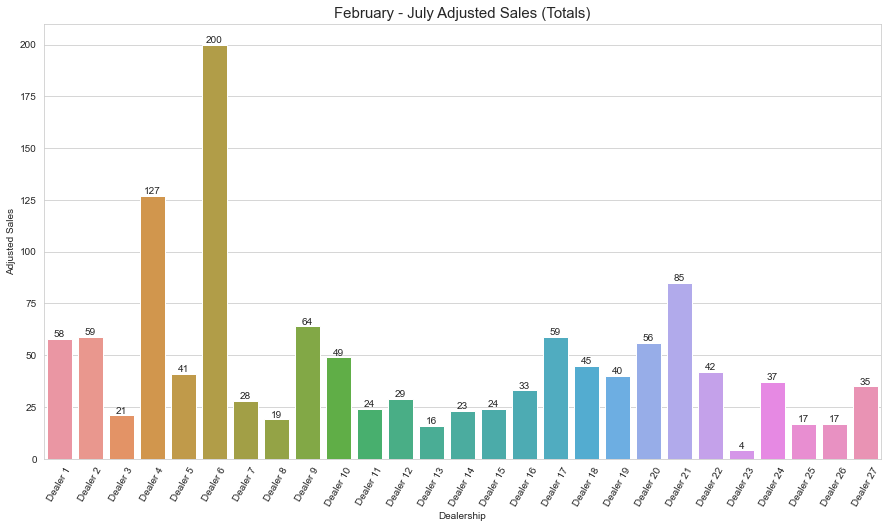

In [42]:
plt.figure(figsize=(15,8))
mplot = sns.barplot(data=Mass_Data_Set, x='Dealership', y='Adjusted Sales', estimator=sum, ci=None)
plt.bar_label(mplot.containers[0])
mplot.set_title('February - July Adjusted Sales (Totals)', fontsize=15)
plt.xticks(rotation=60)
plt.savefig('Mass_Bar_Sales.png')
plt.show()
plt.close()